In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\India_December_2024_Temperature.csv')

In [3]:
data.dropna(inplace=True)

In [4]:
data_long = data.melt(id_vars=['State'], var_name='Date', value_name='Temperature')
data_long['Temperature'] = data_long['Temperature'].astype(float)

In [5]:
data_long['Day'] = data_long['Date'].str.extract(r'(\d+)').astype(int)
data_long.drop(columns=['Date'], inplace=True)

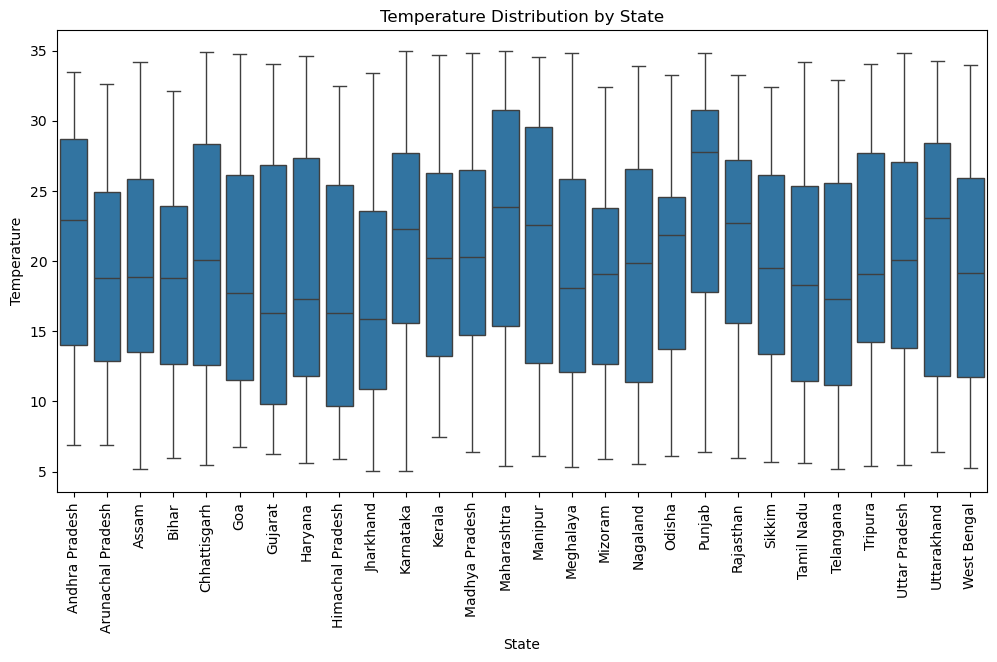

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Temperature', data=data_long)
plt.xticks(rotation=90)
plt.title('Temperature Distribution by State')
plt.show()

In [7]:
state_avg_temp = data_long.groupby('State')['Temperature'].mean().reset_index()
state_avg_temp.columns = ['State', 'Avg_Temperature']

In [8]:
X = state_avg_temp[['Avg_Temperature']]
y = np.arange(len(state_avg_temp))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

In [12]:
results = {}

In [13]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

In [14]:
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

Model Performance:
                                 MSE        R2
Linear Regression          75.199087 -0.080705
Random Forest             150.753017 -1.166510
Support Vector Regressor   78.950952 -0.134624


In [15]:
best_model = results_df['R2'].idxmax()
print(f"The best performing model is {best_model}.")

The best performing model is Linear Regression.
